# 构建一个小型的神经网络
1. 创建数据
2. 初始化学习参数
3. 构建网络模型
4. 构建损失函数
5. 构建优化器
6. 实现一个神经网络

- 导包


In [1]:
import torch
import matplotlib.pyplot as plt
import time
from torch.autograd import Variable
import numpy as np

## 1. 创建数据

In [3]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    x = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return x,y

In [6]:
x,y = get_data()
print(x)
print(y)

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 5.6540],
        [ 9.2700],
        [ 3.1000]])
tensor([1.7000, 2.7600, 2.0900, 3.1900, 1.6940, 1.5730, 3.3660, 2.5960, 2.5300,
        1.2210, 2.8270, 3.4650, 1.6500, 2.9040, 2.4200, 2.9400, 1.3000])


## 2. 初始化学习参数

In [8]:
def get_weights():
    w = Variable(torch.randn(1),requires_grad=True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

In [9]:
w,b = get_weights()
print(w)
print(b)

tensor([1.1534], requires_grad=True)
tensor([-0.0105], requires_grad=True)


## 3. 构建网络模型



In [10]:
def simple_network(x):
    y_pred = torch.matmul(x,w)+b  # (17,1).mm(1,1) => (17,1)
    return y_pred

## 4. 构建损失函数

In [13]:
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if param.grad is not None: # 每次计算梯度前，应确保之前参数的梯度为0，避免梯度的计算受前边梯度的影响
            param.grad.data.zero_()
    loss.backward() # 损失反向传播，计算梯度
    return loss.item()


## 5. 构建优化器
- 处理反向传播过程中梯度下降的快慢，及收敛效果



In [14]:
def optimize(learning_rate):
    w.data -= learning_rate*w.grad.data
    b.data -= learning_rate*b.grad.data


## 6. 实现简单神经网络




In [22]:
time_start=time.time()

x,y = get_data()
print(x)
print(y)
w,b = get_weights()
for i in range(500): # 训练epoch = 500
    y_pred = simple_network(x)
    loss = loss_fn(y,y_pred)
    if i%50==0:
        print("loss:{}".format(loss))
    optimize(learning_rate=1e-3)
time_end=time.time()

print('totally cost',time_end-time_start)


tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 5.6540],
        [ 9.2700],
        [ 3.1000]])
tensor([1.7000, 2.7600, 2.0900, 3.1900, 1.6940, 1.5730, 3.3660, 2.5960, 2.5300,
        1.2210, 2.8270, 3.4650, 1.6500, 2.9040, 2.4200, 2.9400, 1.3000])
loss:357.0709533691406
loss:4.976167678833008
loss:4.176623821258545
loss:3.647890567779541
loss:3.2982418537139893
loss:3.067020893096924
loss:2.9141159057617188
loss:2.813000202178955
loss:2.7461330890655518
loss:2.701914072036743
totally cost 0.09499979019165039


- 绘制拟合图


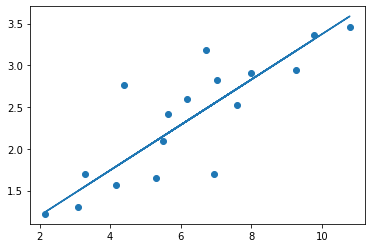

In [19]:
plt.scatter(x,y)
y_pred = torch.matmul(x,w)+b
plt.plot(x.detach().numpy(),y_pred.detach().numpy())
plt.show()


In [20]:
def plot_variable(x,y,z='',**kwargs):
    l = []
    for a in [x,y]:
#         if type(a) == Variable:
        l.append(a.data.numpy())
    plt.plot(l[0],l[1],z,**kwargs)



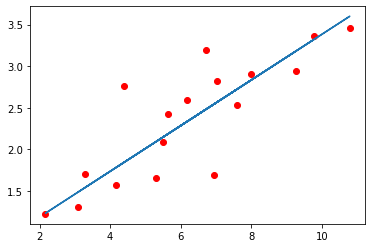

In [23]:
x_numpy = x.data.numpy()
plot_variable(x,y,'ro')
plot_variable(x,y_pred,label='Fitted line')

